In [2]:
%matplotlib inline

import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Always make it pretty.
plt.style.use('ggplot')

# We get some interger -> float typecast warning from sklean below, this keeps them out of our hair.
import warnings
warnings.filterwarnings('ignore')

In [3]:
ATT = pd.read_csv('ATT1.csv')
#ngs_df = pd.read_csv('data/training.csv')

In [4]:
ATT

,date,open,high,low,close,volume
0,1984-07-19,1.0554,1.0576,1.0489,1.0489,934800
1,1984-07-20,1.0532,1.0599,1.0466,1.0510,1557600
2,1984-07-23,1.0466,1.0554,1.0378,1.0510,3313200
3,1984-07-24,1.0554,1.0666,1.0532,1.0599,1549200
4,1984-07-25,1.0599,1.0841,1.0576,1.0731,1828800
...,...,...,...,...,...,...
9185,2020-12-24,28.7300,28.7600,28.5000,28.6900,19153092
9186,2020-12-28,28.9300,28.9591,28.5000,28.5500,41575385
9187,2020-12-29,28.6900,28.8800,28.5100,28.5400,36544749
9188,2020-12-30,28.5400,28.6800,28.4300,28.4900,34302430


In [7]:
ATT = ATT.set_index('date')

In [8]:
close = ATT['close']

In [23]:
close

date
1984-07-23   -0.0021
1984-07-24    0.0089
1984-07-25    0.0043
1984-07-26   -0.0176
1984-07-27   -0.0067
               ...  
2020-12-24   -0.4100
2020-12-28   -0.0800
2020-12-29    0.1300
2020-12-30   -0.0400
2020-12-31    0.3200
Name: close, Length: 9188, dtype: float64

<AxesSubplot:xlabel='date'>

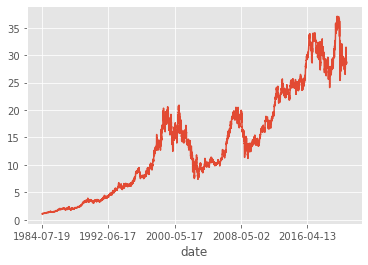

In [10]:
close.plot(kind='line')

In [13]:
#diff
close_diff = close.diff()[1:]
test = sm.tsa.stattools.adfuller(close_diff)
print("ADF p-value for differenced close prices: {0:2.2f}".format(test[1]))

ADF p-value for differenced close prices: 0.00


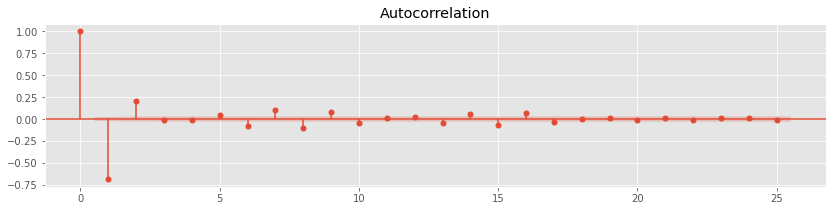

In [14]:
#MA
fig, ax = plt.subplots(1, figsize=(14, 3))
_ = sm.graphics.tsa.plot_acf(close_diff, lags=25, ax=ax)

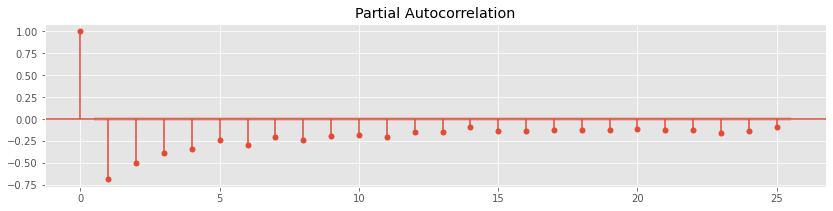

In [15]:
#PACF
fig, ax = plt.subplots(1, figsize=(14, 3))
_ = sm.graphics.tsa.plot_pacf(close_diff, lags=25, ax=ax)

In [22]:
#ARIMA
close_model = ARIMA(close, order=(3, 1, 0)).fit()

In [19]:
close_model.params

const            0.000011
ar.L1.D.close   -1.226462
ar.L2.D.close   -0.900434
ar.L3.D.close   -0.382962
dtype: float64

In [ ]:
#forcast
#close.reindex(pd.date_range(start='01-1996', end='12-2012', freq='M'))

fig, ax = plt.subplots(1, figsize=(14, 4))
ax.plot(close.index, close)
fig = close_model.plot_predict('2020-12-31', '2021', 
                                  dynamic=True, ax=ax, plot_insample=False)

_ = ax.legend().get_texts()[1].set_text("95% Prediction Interval")
_ = ax.legend(loc="lower left")

_ = ax.set_title("Electric Series Forcasts from ARIMA Model")

In [28]:
p=0
q=0
d=0
pdq=[]
aic=[]
for p in range(6):
    for d in range(2):
        for q in range(4):
            try:
                arima_mod=sm.tsa.ARIMA(close,(p,d,q)).fit(transparams=True)

                x=arima_mod.aic

                x1= p,d,q
                print (x1,x)

                aic.append(x)
                pdq.append(x1)
            except:
                pass


keys = pdq
values = aic
d = dict(zip(keys, values))
print (d)

minaic=min(d, key=d.get)


(0, 0, 0) 7621.1354019184355
(0, 0, 1) 771.0038464924255
(0, 0, 2) 744.9844350688254
(0, 0, 3) 761.8729465527249
(0, 1, 0) 17874.735474559682
(0, 1, 1) 7632.431809956241
(0, 1, 2) 876.9206376319999
(0, 1, 3) 990.2842860741293
(1, 0, 0) 4640.857790819748
(1, 0, 1) 745.1331500004817
(1, 0, 3) 748.4784891346317
(1, 1, 0) 12020.539080516255
(1, 1, 3) 859.755400851649
(2, 0, 0) 3625.331687297061
(2, 0, 1) 747.0916272785071
(2, 0, 2) 741.1018468400725
(2, 1, 0) 9320.664518273225
(3, 0, 0) 3104.9366181476
(3, 0, 1) 738.2680727771949
(3, 1, 0) 7865.187212385816
(4, 0, 0) 2677.4655329631605
(4, 0, 1) 718.9098056895746
(4, 0, 2) 719.8492597921031
(4, 1, 0) 6732.007488334839
(5, 0, 0) 2443.828232265583
(5, 0, 1) 718.57262756192
(5, 0, 2) 710.5095449515611
(5, 1, 0) 6202.151981985546
{(0, 0, 0): 7621.1354019184355, (0, 0, 1): 771.0038464924255, (0, 0, 2): 744.9844350688254, (0, 0, 3): 761.8729465527249, (0, 1, 0): 17874.735474559682, (0, 1, 1): 7632.431809956241, (0, 1, 2): 876.9206376319999, (0, 